In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# counting the number of spams and hams
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [ ]:
# creating a new column which contains 1 if the message is spam else 0.
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# Creating training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['spam'], test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(4457,)

In [ ]:
y_train.shape

(4457,)

In [ ]:
# checking the type of 'X_train'
type(X_train)

pandas.core.series.Series

In [ ]:
X_train[:4]

,Message
1114,"No I'm good for the movie, is it ok if I leave..."
3589,If you were/are free i can give. Otherwise nal...
3095,Have you emigrated or something? Ok maybe 5.30...
1012,"I just got home babe, are you still awake ?"


In [ ]:
X_train[1114]

"No I'm good for the movie, is it ok if I leave in an hourish?"

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train[:4]

,spam
1114,0
3589,0
3095,0
1012,0


In [ ]:
y_train[1114]

0

We will build the `Bag of words` model using `Countvectorizer`.  
This will help us to build `numeric representation`.  

 CountVectorize converts a collection of text documents to a matrix of token counts.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_cv = v.fit_transform(X_train.values)

In [ ]:
X_train_cv

<4457x7788 sparse matrix of type '<class 'numpy.int64'>'
	with 59003 stored elements in Compressed Sparse Row format>

In [ ]:
# In order to view "X_train_cv" convert this to numpy array
X_train_cv.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# checking the shape
X_train_cv.shape

(4457, 7788)

There are `7788` unique words.

In [ ]:
v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [ ]:
# In order to check entire vocabulary.
v.get_feature_names_out()[1000:1050]

array(['anythingtomorrow', 'anytime', 'anyway', 'anyways', 'anywhere',
       'aom', 'apart', 'apartment', 'apes', 'aphex', 'apnt', 'apo',
       'apologise', 'apologize', 'app', 'apparently', 'appeal', 'appear',
       'appendix', 'applebees', 'apples', 'application', 'apply',
       'applyed', 'applying', 'appointment', 'appointments', 'appreciate',
       'appreciated', 'approaches', 'approaching', 'appropriate',
       'approve', 'approved', 'approx', 'apps', 'appt', 'appy', 'april',
       'aproach', 'apt', 'aptitude', 'aquarius', 'ar', 'arab', 'arabian',
       'arcade', 'ard', 'are', 'area'], dtype=object)

In [ ]:
# Checking all the methods
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_

In [ ]:
v.vocabulary_

{'no': 4809,
 'good': 3196,
 'for': 2943,
 'the': 6861,
 'movie': 4623,
 'is': 3769,
 'it': 3781,
 'ok': 4932,
 'if': 3615,
 'leave': 4084,
 'in': 3661,
 'an': 957,
 'hourish': 3529,
 'you': 7751,
 'were': 7502,
 'are': 1048,
 'free': 2990,
 'can': 1625,
 'give': 3158,
 'otherwise': 5021,
 'nalla': 4696,
 'adi': 816,
 'entey': 2603,
 'nattil': 4716,
 'kittum': 3977,
 'have': 3369,
 'emigrated': 2570,
 'or': 4993,
 'something': 6351,
 'maybe': 4423,
 '30': 432,
 'was': 7429,
 'bit': 1359,
 'hopeful': 3505,
 'just': 3899,
 'got': 3213,
 'home': 3485,
 'babe': 1191,
 'still': 6524,
 'awake': 1169,
 'kay': 3926,
 'since': 6213,
 'we': 7455,
 'out': 5028,
 'already': 924,
 'me': 4428,
 'not': 4845,
 'workin': 7637,
 'once': 4954,
 'get': 3132,
 'job': 3852,
 'what': 7515,
 'he': 3379,
 'said': 5915,
 'matter': 4412,
 'my': 4679,
 'mind': 4505,
 'saying': 5963,
 'some': 6341,
 'other': 5019,
 'there': 6880,
 'oh': 4927,
 'yeah': 7723,
 'and': 961,
 'diet': 2305,
 'flew': 2891,
 'window': 756

In [ ]:
v.get_feature_names_out()[4809]

'no'

the word `no` is at `4809th` position


In [ ]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# finding the positions where value is not zero.
np.where(X_train_np[0] != 0)

(array([ 957, 2943, 3196, 3529, 3615, 3661, 3769, 3781, 4084, 4623, 4809,
        4932, 6861]),)

In [ ]:
X_train[:4]

,Message
1114,"No I'm good for the movie, is it ok if I leave..."
3589,If you were/are free i can give. Otherwise nal...
3095,Have you emigrated or something? Ok maybe 5.30...
1012,"I just got home babe, are you still awake ?"


In [ ]:
X_train[1114] # 1114 id value is at 0th index in "X_train_np"

"No I'm good for the movie, is it ok if I leave in an hourish?"

In [ ]:
v.get_feature_names_out()[6861]

'the'

## Building the Naive Bayes model


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [ ]:
X_test_cv = v.transform(X_test)

In [ ]:
y_pred = model.predict(X_test_cv)

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99       955\n           1       0.98      0.93      0.95       160\n\n    accuracy                           0.99      1115\n   macro avg       0.98      0.96      0.97      1115\nweighted avg       0.99      0.99      0.99      1115\n'

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.98      0.93      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_cv = v.transform(emails)
model.predict(emails_cv)

array([0, 1])

## We can create a pipeline to automate some manual steps

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
y_pred = clf.predict(X_test)

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99       955\n           1       0.98      0.93      0.95       160\n\n    accuracy                           0.99      1115\n   macro avg       0.98      0.96      0.97      1115\nweighted avg       0.99      0.99      0.99      1115\n'

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.98      0.93      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## Exercise


In [ ]:
!unzip "/content/IMDB Dataset.csv.zip"

Archive:  /content/IMDB Dataset.csv.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable

df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
df['Category'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
df.head()

,review,sentiment,Category
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [ ]:
df['Category'].value_counts()

,count
Category,
1,25000
0,25000


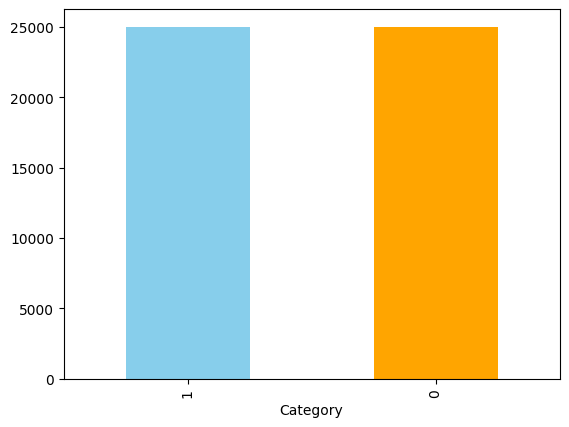

In [ ]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.
df['Category'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.show()

In [ ]:
#Do the 'train-test' splitting with test size of 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['Category'], test_size=0.2, random_state=0)

### Exercise-1: Using RandomForest
using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([
    ('count', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy'))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('count', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8346
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5035
           1       0.84      0.83      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



### Exercise 2: Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipe = Pipeline([
    ('count', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('count', CountVectorizer()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6557
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5035
           1       0.66      0.64      0.65      4965

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



### Exercise 3: using Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('count', CountVectorizer()),
    ('NB', MultinomialNB())
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('count', CountVectorizer()), ('NB', MultinomialNB())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5035
           1       0.87      0.81      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



### Why KNN model fails to produce good result?

- As Machine learning algorithms does not work on Text data directly, we need to convert them into numeric vector and feed that into models while training.
In this process, we convert text into a very high dimensional numeric vector using the technique of Bag of words.
- Model like K-Nearest Neighbours(KNN) doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of model.
- The easy calculation of probabilities for the words in corpus(Bag of words) and storing them in contigency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.
- As Random Forest uses Bootstrapping(Row and column Sampling) with many decision tree and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifing the categories.
- Machine Learning is like trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which give good results and satisfy the requirements like latency, interpretability etc.